# Combined Cycle Power Plant Project using ANNs:

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.

The datatset is available from UCI Machine Learning Repo: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

There are four features:
- AT (Ambient Tempreture)
- V  (Exhaust Vaccuum)
- AP (Ambient Pressure)
- RH (Relative Humidity)

There is one Label:
- PE (Electrical Energy Output)

In [9]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import TensorBoard 

### Load Data

In [10]:
# Load Data
#Note that the data was converted to csv format in excel and re-named to Data_Regression
data_set = pd.read_csv("Data_Regression.csv")

In [12]:
# View the first few rows of data set
data_set.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Expolare the data 

Search for insights from the data by visualing different features against the labels/targets.

In [13]:
# Lets get some information about the different columns.
#This can be used to check for missing values
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


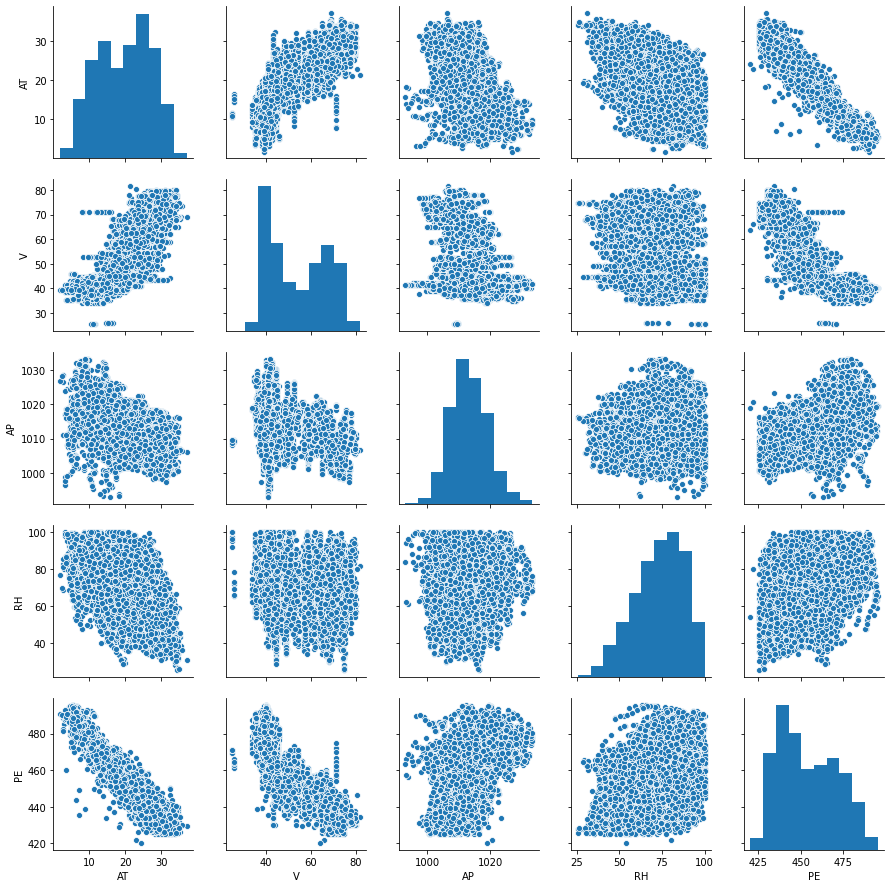

In [14]:
# Lets view a pairplot of the columns using seaborn
sns.pairplot(data_set)

#### Visualise each feature and target numerical distribution using Seaborn

<AxesSubplot:xlabel='PE'>

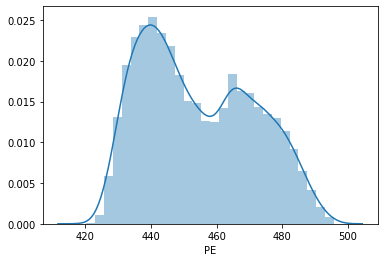

In [15]:
# Visualise a distribution of the Output Power (PE)
sns.distplot(data_set["PE"])

<AxesSubplot:xlabel='AP'>

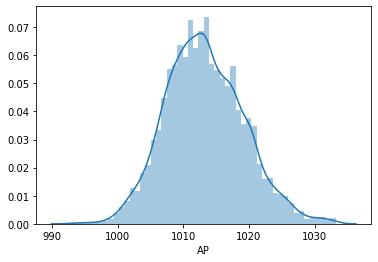

In [20]:
# Visualise a distribution of the Ambient Pressure (AP)
sns.distplot(data_set["AP"])

<AxesSubplot:xlabel='AT'>

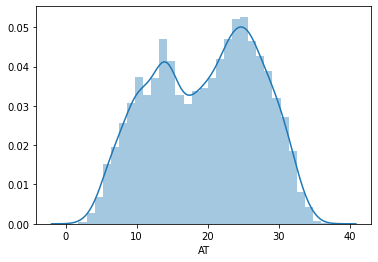

In [21]:
# Visualise a distribution of the Ambient Temperature (AT)
sns.distplot(data_set["AT"])

<AxesSubplot:xlabel='V'>

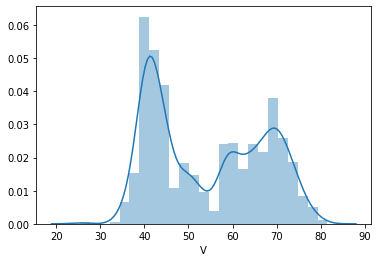

In [22]:
# Visualise a distribution of the Exhaust Vacuum(V)
sns.distplot(data_set["V"])

<AxesSubplot:xlabel='RH'>

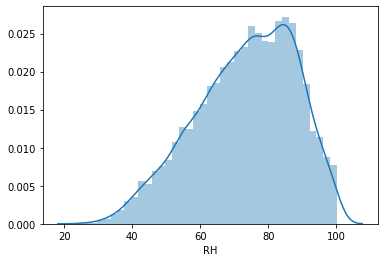

In [23]:
# Visualise a distribution of the Relative Humidity(RH)
sns.distplot(data_set["RH"])

#### Visualise each feature against the the target(Output Power)

Text(0, 0.5, 'Output Power')

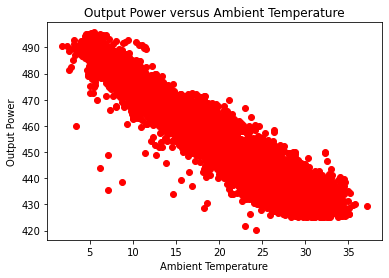

In [16]:
plt.scatter(data_set["AT"], data_set["PE"], color = "r") # Visualise the ambient temperature(AT) versus output power(PE)
plt.title("Output Power versus Ambient Temperature")
plt.xlabel("Ambient Temperature")
plt.ylabel("Output Power")

Text(0, 0.5, 'Output Power')

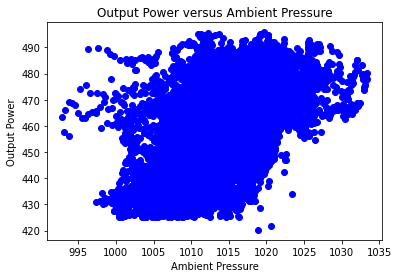

In [17]:
plt.scatter(data_set["AP"], data_set["PE"], color="b") # Visualise the ambient pressure(AP) versus output power(PE)
plt.title("Output Power versus Ambient Pressure")
plt.xlabel("Ambient Pressure")
plt.ylabel("Output Power")

Text(0, 0.5, 'Output Power [KW]')

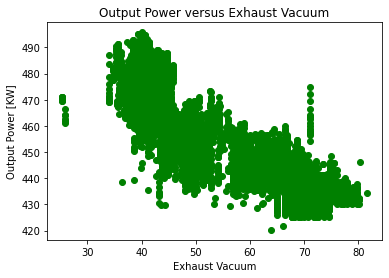

In [18]:
plt.scatter(data_set["V"], data_set["PE"], color = "g")# Visulaise the Exhaust Vacuum(V) versus the output power(PE)
plt.title("Output Power versus Exhaust Vacuum")
plt.xlabel("Exhaust Vacuum")
plt.ylabel("Output Power [KW]")

Text(0, 0.5, 'Output Power [KW]')

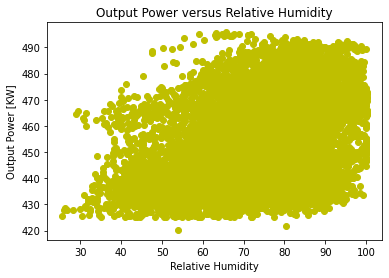

In [19]:
plt.scatter(data_set["RH"], data_set["PE"], color = "y")# Visulaise the Exhaust Vacuum(V) versus the output power(PE)
plt.title("Output Power versus Relative Humidity")
plt.xlabel("Relative Humidity")
plt.ylabel("Output Power [KW]")

#### Split the Data into Feature matrix and Target vector

In [24]:
feature_matrix = data_set.iloc[:, :-1].values # Locate and get the values from all the columns except last one
target_vector = data_set.iloc[:, -1].values # Locate and get the values from the last column

In [25]:
# View the shape of the feature_matrix = (9568 rows, 4 columns)
feature_matrix.shape

(9568, 4)

In [26]:
# View the shape of the target_vector = (9568 rows, 1 column)
target_vector.shape

(9568,)

##### Feature Scaling:
Conduct Feature Scaling to the Features because, from the feature distributions, AT, V and RH are all within a range of 1-100, however, the AP feature is distrubuted from 900 to 1000+.
So this is done to get the all the features within the same range. 

In [32]:
import sklearn
from sklearn.preprocessing import StandardScaler

# Before we scale the features, we must split it into training, validation and test set to avoid information leakage
from sklearn.model_selection import train_test_split

# Get Full Training Set and Test set
X_train_full, X_test, y_train_full, y_test = train_test_split(feature_matrix, target_vector,test_size = 0.10 )

In [33]:
print(X_train_full.shape, X_test.shape)

(8611, 4) (957, 4)


In [34]:
print(y_train_full.shape, y_test.shape)

(8611,) (957,)


In [41]:
# Lets split the full training set into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.10)

In [42]:
print(X_train.shape, X_valid.shape)

(7749, 4) (862, 4)


In [43]:
print(y_train.shape, y_valid.shape)

(7749,) (862,)


###### Lets actually scale the features

In [44]:
# use Standardisation to scale the features.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [45]:
print(X_train.shape, X_valid.shape, X_test.shape)

(7749, 4) (862, 4) (957, 4)


In [46]:
# Lets scale the targets by dividing by 100:
y_train = y_train/100.0
y_valid = y_valid/100.0
y_test = y_test/100.0

<AxesSubplot:>

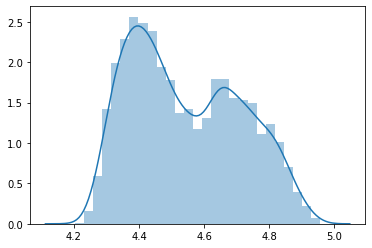

In [47]:
# Check that the distribution of the targets is still the same
sns.distplot(y_train)

<AxesSubplot:>

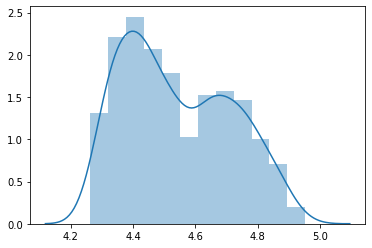

In [48]:
# Check that the distribution of the targets is still the same
sns.distplot(y_valid)

<AxesSubplot:>

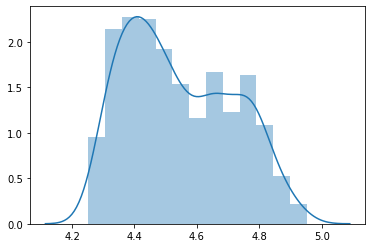

In [49]:
# Check that the distribution of the targets is still the same
sns.distplot(y_test)

## Build the Neural Network Structure

In [52]:
# Get the input shape which will go into the input layer of te neural network.
# Usually, we need 1 neuron per feature.
input_shape = X_train.shape[1:]

In [53]:
# Import Input layer from Keras
from tensorflow.keras.layers import Input
regressor = Sequential() # create an object of the Sequential class
regressor.add(Input(shape = input_shape)) # Input Layer
regressor.add(Dense(units = 100, activation = "relu")) # First Hidden Layer
regressor.add(Dense(units = 1)) #Output layer
regressor.summary()
# We dont have alot oof data, so I limited to the number of hidden layers.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


#### Compile the model to fully connect the layers.

In [55]:
regressor.compile(loss = "mse", optimizer = SGD(lr =0.001))

### Training and the model and specify callbacks:
- Callbacks to use will be ModelCheckpoint and EarlyStopping
- Another callback to use will be TensorBoard so that we can visualise the training and validation  processes.

In [73]:
# create callback objects for each class. Define the log directory for tensorboard
modelcheckpoint = ModelCheckpoint("regression_model.h5", save_best_only = True)
early_stop = EarlyStopping(patience = 15, restore_best_weights = True)

# Now we are going to create a directory to store the logs for TensorBoard
import os
run_index = 2 # increment this at every run
run_logdir = os.path.join(os.curdir, "CCPP_logs", "run_{:03d}".format(run_index))
run_logdir

tensorboard = TensorBoard(run_logdir)

In [61]:
## Train the model

history = regressor.fit(X_train, y_train, epochs = 100, callbacks = [modelcheckpoint, early_stop, tensorboard],validation_data = (X_valid, y_valid))

Train on 7749 samples, validate on 862 samples
Epoch 1/100
7749/7749 [==============================] - 1s 111us/sample - loss: 0.3467 - val_loss: 0.2648
Epoch 2/100
7749/7749 [==============================] - 1s 100us/sample - loss: 0.2283 - val_loss: 0.1785
Epoch 3/100
7749/7749 [==============================] - 1s 106us/sample - loss: 0.1616 - val_loss: 0.1288
Epoch 4/100
7749/7749 [==============================] - 1s 103us/sample - loss: 0.1213 - val_loss: 0.0980
Epoch 5/100
7749/7749 [==============================] - 1s 90us/sample - loss: 0.0953 - val_loss: 0.0781
Epoch 6/100
7749/7749 [==============================] - 1s 99us/sample - loss: 0.0776 - val_loss: 0.0640
Epoch 7/100
7749/7749 [==============================] - 1s 94us/sample - loss: 0.0648 - val_loss: 0.0536
Epoch 8/100
7749/7749 [==============================] - 1s 87us/sample - loss: 0.0551 - val_loss: 0.0460
Epoch 9/100
7749/7749 [==============================] - 1s 94us/sample - loss: 0.0474 - val_loss: 0.

7749/7749 [==============================] - 1s 77us/sample - loss: 0.0031 - val_loss: 0.0031
Epoch 78/100
7749/7749 [==============================] - 1s 84us/sample - loss: 0.0030 - val_loss: 0.0030
Epoch 79/100
7749/7749 [==============================] - 1s 69us/sample - loss: 0.0030 - val_loss: 0.0030
Epoch 80/100
7749/7749 [==============================] - 1s 84us/sample - loss: 0.0030 - val_loss: 0.0030
Epoch 81/100
7749/7749 [==============================] - 1s 80us/sample - loss: 0.0030 - val_loss: 0.0030
Epoch 82/100
7749/7749 [==============================] - 1s 69us/sample - loss: 0.0030 - val_loss: 0.0030
Epoch 83/100
7749/7749 [==============================] - 1s 76us/sample - loss: 0.0029 - val_loss: 0.0030
Epoch 84/100
7749/7749 [==============================] - 1s 74us/sample - loss: 0.0029 - val_loss: 0.0030
Epoch 85/100
7749/7749 [==============================] - 1s 78us/sample - loss: 0.0029 - val_loss: 0.0029
Epoch 86/100
7749/7749 [==========================

In [74]:
history_2 = regressor.fit(X_train, y_train, epochs = 50, callbacks = [modelcheckpoint, early_stop, tensorboard], validation_data = (X_valid, y_valid))

Train on 7749 samples, validate on 862 samples
Epoch 1/50
7749/7749 [==============================] - 2s 260us/sample - loss: 0.0027 - val_loss: 0.0028
Epoch 2/50
7749/7749 [==============================] - 1s 102us/sample - loss: 0.0027 - val_loss: 0.0028
Epoch 3/50
7749/7749 [==============================] - 1s 108us/sample - loss: 0.0027 - val_loss: 0.0028
Epoch 4/50
7749/7749 [==============================] - 1s 95us/sample - loss: 0.0027 - val_loss: 0.0028
Epoch 5/50
7749/7749 [==============================] - 1s 106us/sample - loss: 0.0027 - val_loss: 0.0027
Epoch 6/50
7749/7749 [==============================] - 1s 126us/sample - loss: 0.0027 - val_loss: 0.0027
Epoch 7/50
7749/7749 [==============================] - 1s 130us/sample - loss: 0.0027 - val_loss: 0.0027
Epoch 8/50
7749/7749 [==============================] - 1s 116us/sample - loss: 0.0026 - val_loss: 0.0027
Epoch 9/50
7749/7749 [==============================] - 1s 135us/sample - loss: 0.0026 - val_loss: 0.0027


In [75]:
# Use these lines to visualise training process on TensorBoard
%reload_ext tensorboard
%tensorboard --logdir=./CCPP_logs --port=6006


Reusing TensorBoard on port 6006 (pid 9364), started 0:19:53 ago. (Use '!kill 9364' to kill it.)

Text(0.5, 1.0, 'Regressor Performance Plots')

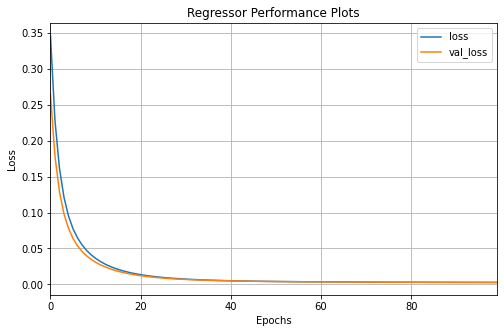

In [65]:
# We can also visualise the training process here(Using the history method.)
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Regressor Performance Plots")

### Evaulate the model

In [76]:
# Take a portion of the test set to use when making predictions
X_new, X_test_new = X_test[:5], X_test[5:]
y_new, y_test_new = y_test[:5],y_test[5:]

In [77]:
print(X_test_new.shape, X_new.shape)

(952, 4) (5, 4)


In [78]:
print(y_test_new.shape, y_new.shape)

(952,) (5,)


In [79]:
regressor.evaluate(X_test_new, y_test_new)

952/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002597083226081078

### Make Predictions using our model

In [80]:
predictions = regressor.predict(X_new)

In [81]:
# Compare predictions to actual values:
print("Model Predictions", predictions*100.0)
print("Actual Power Output", y_new*100.0)

Model Predictions [[463.98154]
 [444.93536]
 [477.14502]
 [467.24963]
 [480.67786]]
Actual Power Output [461.45 447.3  481.03 468.84 480.47]
